In [1]:
import pandas as pd
import numpy as np
import numpy.random as random
import patternrekt as prekt

In [2]:
# %%bash
# mkdir -p data
# cd data
# kaggle datasets download -d uciml/mushroom-classification
# kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews
# find . -name "*.zip" -exec unzip {} \;

In [3]:
#kaggle datasets download -d uciml/mushroom-classification

df = pd.read_csv('data/mushrooms.csv')
prekt.clean_col(df)

In [4]:
def rand_weight(clazz):
    mu = {'p': 2.2, 'e': 3.3}[clazz]
    sigma = {'p': 1.0, 'e': 1.3}[clazz]
    return 1 + abs(random.randn()*sigma + mu)

def rand_height(clazz):
    mu = {'p': 3, 'e': 4}[clazz]
    sigma = {'p': 1.5, 'e': 2}[clazz]
    return 2 + abs(random.randn()*sigma + mu)
np.random.seed(999)   
weight = pd.Series((rand_weight(m.xclass) for m in df.itertuples()), name="weight")
height = pd.Series((rand_height(m.xclass) for m in df.itertuples()), name="height")

In [5]:
newdf = pd.concat([df.xclass, df.cap_color, weight, height], axis=1)
display(newdf)

,xclass,cap_color,weight,height
0,p,n,3.327158,5.158268
1,e,y,6.122458,7.143689
2,e,w,4.709259,7.398728
3,p,w,2.341551,4.733059
4,e,g,3.954025,4.040427
5,e,y,3.456429,6.422466
6,e,w,6.336148,9.964059
7,e,w,1.581219,6.249765
8,p,w,4.656328,2.749401
9,e,y,5.528881,9.222293


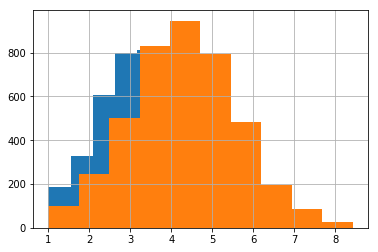

In [6]:
newdf[newdf.xclass=='p'].weight.hist()
newdf[newdf.xclass=='e'].weight.hist()

In [7]:
mask = random.rand(len(newdf)) < 0.8
train = newdf[mask]
test = newdf[~mask]

In [8]:
train

,xclass,cap_color,weight,height
1,e,y,6.122458,7.143689
2,e,w,4.709259,7.398728
3,p,w,2.341551,4.733059
4,e,g,3.954025,4.040427
5,e,y,3.456429,6.422466
7,e,w,1.581219,6.249765
8,p,w,4.656328,2.749401
9,e,y,5.528881,9.222293
10,e,y,3.779738,7.656461
11,e,y,4.709795,6.612979


In [9]:
train.to_csv('../data/mushrooms_homework_train.csv', index=False)
train.to_csv('../data/mushrooms_homework_test.csv', index=False)

In [10]:
df = pd.read_csv('data/Womens Clothing E-Commerce Reviews.csv')
np.random.seed(999)
mask = random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]
train.to_csv('../data/clothing_reviews_train.csv', index=False)
test.to_csv('../data/clothing_reviews_test.csv', index=False)

